In [1]:
from pyprojroot import here
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
weather_path = here("data/raw/WTH.csv")
df = pd.read_csv(weather_path)
# convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")

<Axes: xlabel='date'>

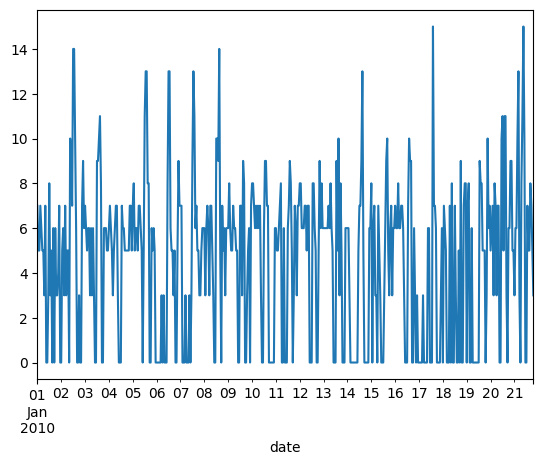

In [ ]:
df["WindSpeed"][:500].plot()

<Axes: xlabel='date'>

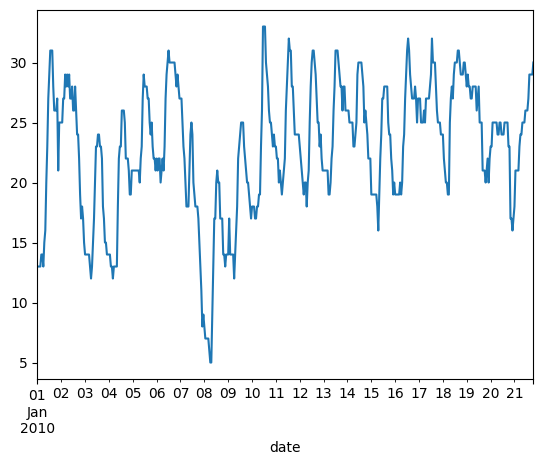

In [ ]:
df["WetBulbFarenheit"][:500].plot()

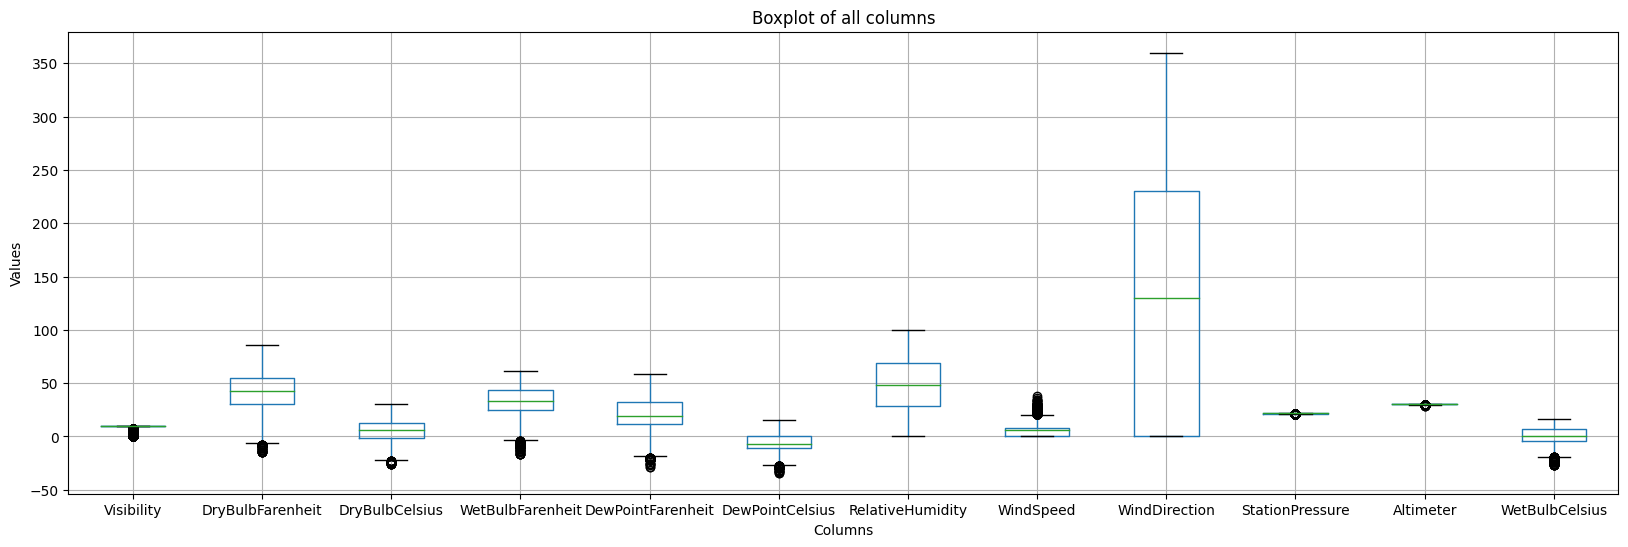

In [3]:
# create a boxplot for each column
fig, ax = plt.subplots(figsize=(20, 6))
df.boxplot(ax=ax)

# set the title and axis labels
plt.title('Boxplot of all columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# show the plot
plt.show()

In [4]:
print("Firs valid index:", df.first_valid_index(), "Last valid index:", df.last_valid_index())
print("Total number of samples:", len(df))

Firs valid index: 1/1/2010 0:00 Last valid index: 12/31/2013 23:00
Total number of samples: 35064


In [5]:
print("Number of missing values in each column:\n", df.isna().sum())

Number of missing values in each column:
 Visibility           0
DryBulbFarenheit     0
DryBulbCelsius       0
WetBulbFarenheit     0
DewPointFarenheit    0
DewPointCelsius      0
RelativeHumidity     0
WindSpeed            0
WindDirection        0
StationPressure      0
Altimeter            0
WetBulbCelsius       0
dtype: int64


In [31]:
print("Data type of each column:\n", df.dtypes)

Data type of each column:
 Visibility           float64
DryBulbFarenheit       int64
DryBulbCelsius         int64
WetBulbFarenheit       int64
DewPointFarenheit      int64
DewPointCelsius        int64
RelativeHumidity       int64
WindSpeed              int64
WindDirection          int64
StationPressure      float64
Altimeter            float64
WetBulbCelsius       float64
dtype: object


In [6]:
print("df Description:")
df.describe()

df Description:


,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,StationPressure,Altimeter,WetBulbCelsius
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,9.385894,42.979438,6.125000,33.717944,21.713068,-5.677247,49.843344,5.651580,132.617528,21.530753,30.199858,1.026081
std,2.034966,17.068807,9.420843,12.689218,14.507766,8.037367,25.143403,4.845549,102.147659,0.174853,0.230147,6.898354
min,0.000000,-15.000000,-26.000000,-16.000000,-29.000000,-34.000000,0.000000,0.000000,0.000000,20.660000,29.050000,-26.400000
25%,10.000000,30.000000,-1.000000,25.000000,12.000000,-11.000000,29.000000,0.000000,0.000000,21.420000,30.050000,-3.800000
50%,10.000000,43.000000,6.000000,33.000000,19.000000,-7.000000,48.000000,6.000000,130.000000,21.560000,30.240000,0.600000
75%,10.000000,55.000000,13.000000,44.000000,32.000000,0.000000,69.000000,8.000000,230.000000,21.670000,30.380000,6.600000
max,10.000000,86.000000,30.000000,61.000000,59.000000,15.000000,100.000000,38.000000,360.000000,21.880000,30.660000,16.300000


 I will use float32 since int64 and float64 requires more memory and aacording to the ranges float32 can cover all the ranges in the dataset

In [7]:
df = df.astype('Float32')

In [8]:
print("Double check df Description after type change:")
df.describe()

Double check df Description after type change:


,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,StationPressure,Altimeter,WetBulbCelsius
count,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0,35064.0
mean,9.385894,42.979438,6.125,33.717944,21.713068,-5.677247,49.843344,5.65158,132.617528,21.530754,30.199856,1.026081
std,2.034966,17.068806,9.420843,12.689218,14.507766,8.037367,25.143402,4.845549,102.147659,0.174853,0.230147,6.898354
min,0.0,-15.0,-26.0,-16.0,-29.0,-34.0,0.0,0.0,0.0,20.66,29.049999,-26.4
25%,10.0,30.0,-1.0,25.0,12.0,-11.0,29.0,0.0,0.0,21.42,30.049999,-3.8
50%,10.0,43.0,6.0,33.0,19.0,-7.0,48.0,6.0,130.0,21.559999,30.24,0.6
75%,10.0,55.0,13.0,44.0,32.0,0.0,69.0,8.0,230.0,21.67,30.379999,6.6
max,10.0,86.0,30.0,61.0,59.0,15.0,100.0,38.0,360.0,21.879999,30.66,16.299999
